In [698]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 1.Read the data as an appropriate Time Series data and plot the data.

In [769]:
df_spark=pd.read_csv('Sparkling.csv')

In [11]:
df_spark.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [770]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [772]:
df_spark['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_spark.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [773]:
df_spark.set_index(keys='Time_Stamp',drop=True,inplace=True)
df_spark.drop('YearMonth',axis=1, inplace=True)
df_spark.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [15]:
df_spark.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [558]:
print("The number of rows: ",df_spark.shape[0], "\n""The number of columns: ",df_spark.shape[1])

The number of rows:  187 
The number of columns:  1


In [17]:
df_spark.isnull().sum()

Sparkling    0
dtype: int64

In [1015]:
df_spark.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

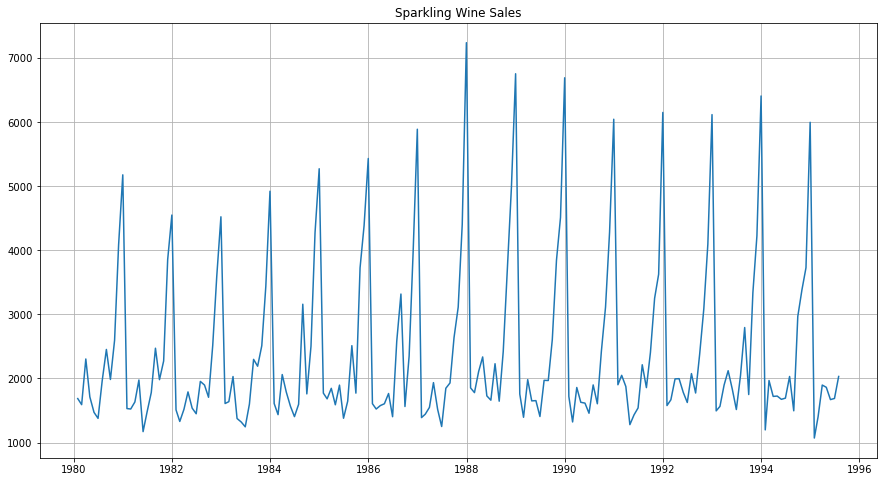

In [50]:
from pylab import rcParams
#rcParams['figure.figsize'] = 15,8

plt.grid();
plt.plot(df_spark)
plt.title('Sparkling Wine Sales')
plt.show()

In [22]:
df_spark.index.year

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995, 1995],
           dtype='int64', name='Time_Stamp', length=187)

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

Box plot year wise

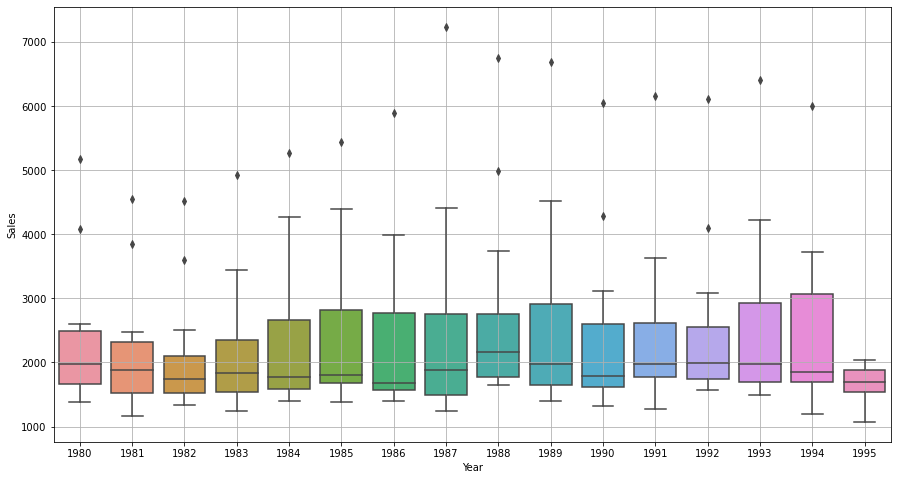

In [51]:
sns.boxplot(df_spark.index.year , df_rose['Sparkling'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

Box plot Monthly

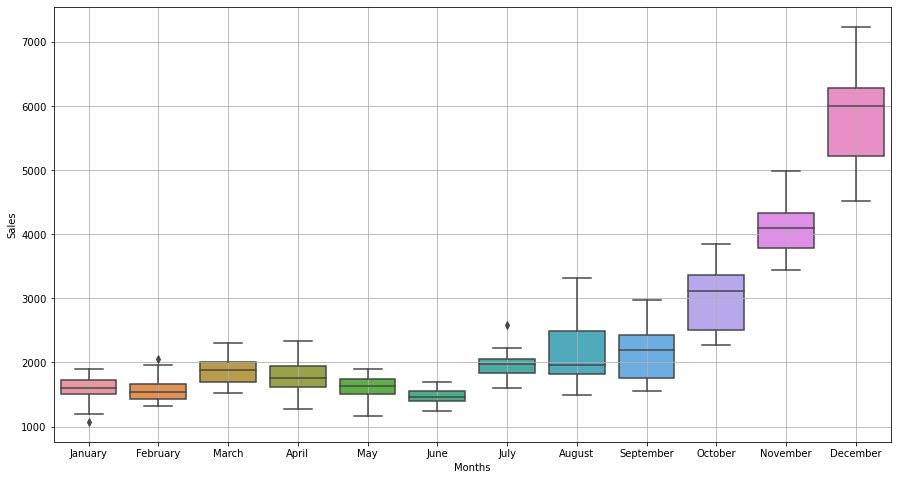

In [24]:
sns.boxplot(df_spark.index.month_name() , df_spark['Sparkling'])
plt.grid()
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import month_plot

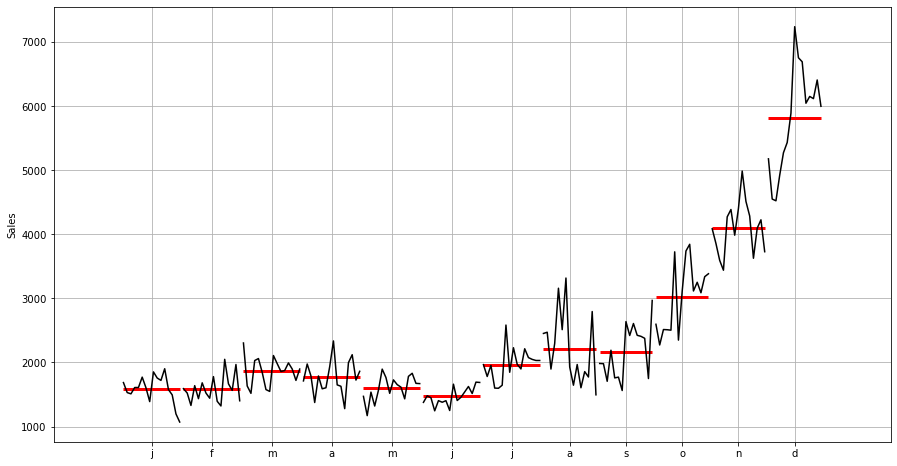

In [26]:
month_plot(df_spark['Sparkling'],ylabel='Sales')
plt.grid();

In [27]:
yearly_sales_across_month=pd.pivot_table(df_spark,values='Sparkling',columns=df_spark.index.month, index=df_spark.index.year)
yearly_sales_across_month

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

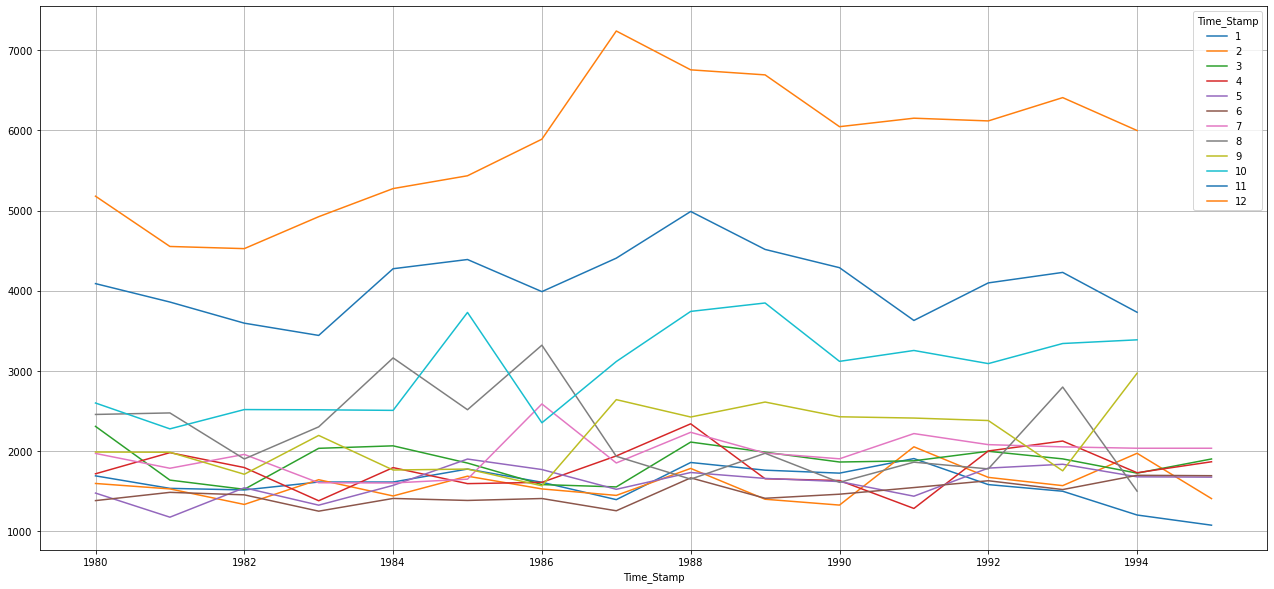

In [28]:
fig, ax = plt.subplots(figsize=(22,10))

yearly_sales_across_month.plot(ax=ax)
plt.grid()
plt.show()

Yearly Plot

In [52]:
df_sparkyearly_sum=df_spark.resample('A').sum()
df_sparkyearly_sum.head()

Sparkling
Time_Stamp           
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

Text(0.5, 0, 'Sum of observation at each year')

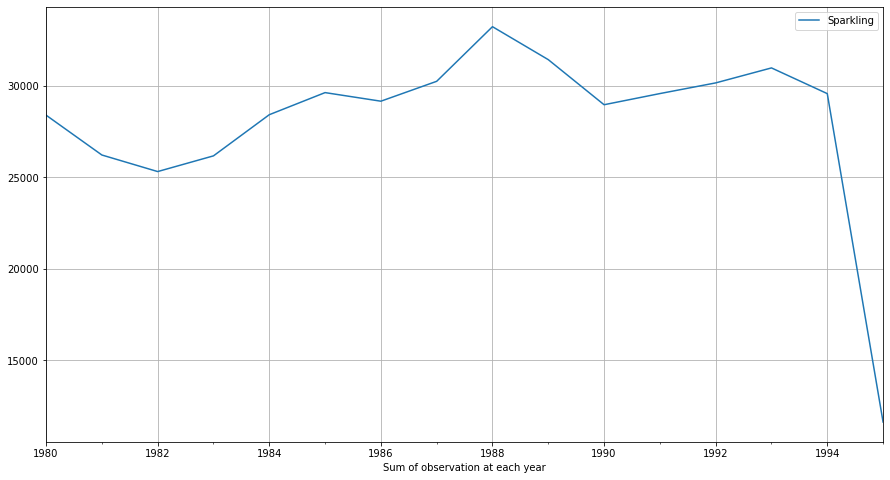

In [53]:
df_sparkyearly_sum.plot()
plt.grid()
plt.xlabel('Sum of observation at each year')

Quarterly Plot

In [32]:
df_sparkquartely_sum=df_spark.resample('Q').sum()
df_sparkquartely_sum.head()

Sparkling
Time_Stamp           
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

Text(0.5, 0, 'Sum of Quartely values')

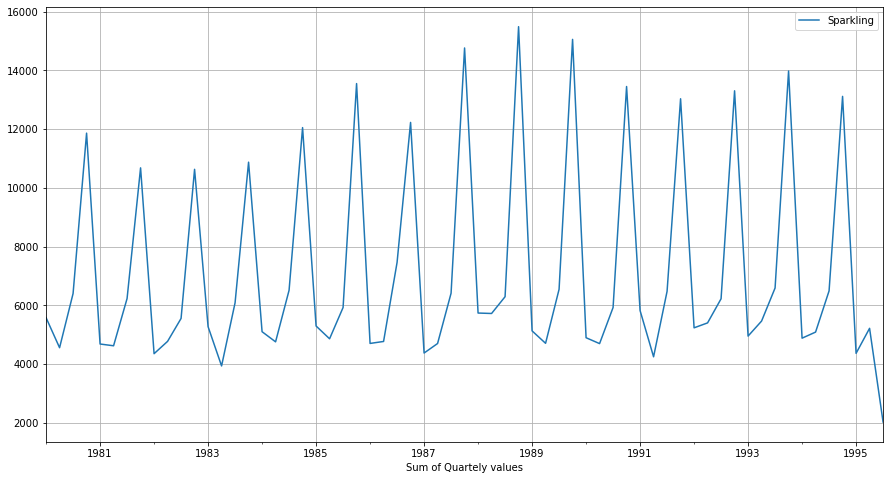

In [33]:
df_sparkquartely_sum.plot()
plt.grid()
plt.xlabel('Sum of Quartely values')

Daily Plot

In [34]:
df_sparkdaily_sum=df_spark.resample('D').sum()
df_sparkdaily_sum

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-01          0
1980-02-02          0
1980-02-03          0
1980-02-04          0
...               ...
1995-07-27          0
1995-07-28          0
1995-07-29          0
1995-07-30          0
1995-07-31       2031

[5661 rows x 1 columns]

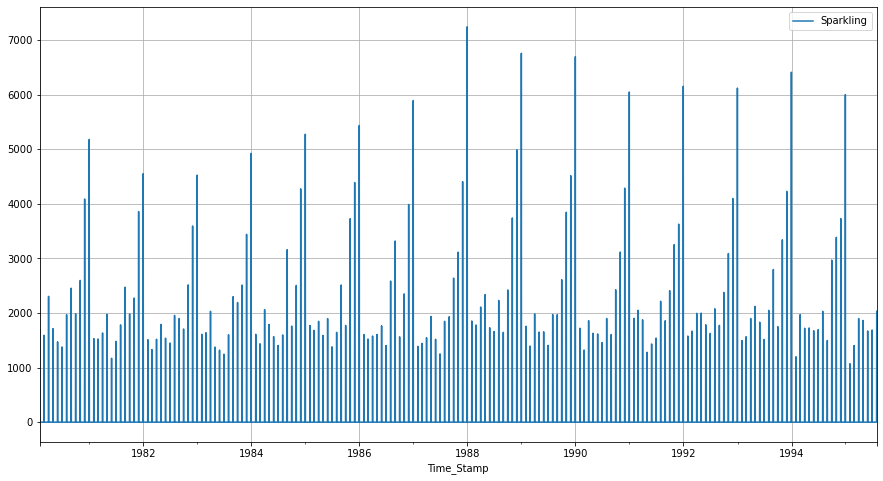

In [560]:
df_sparkdaily_sum.plot()
plt.grid()

### Plot the Empirical Cumulative Distribution

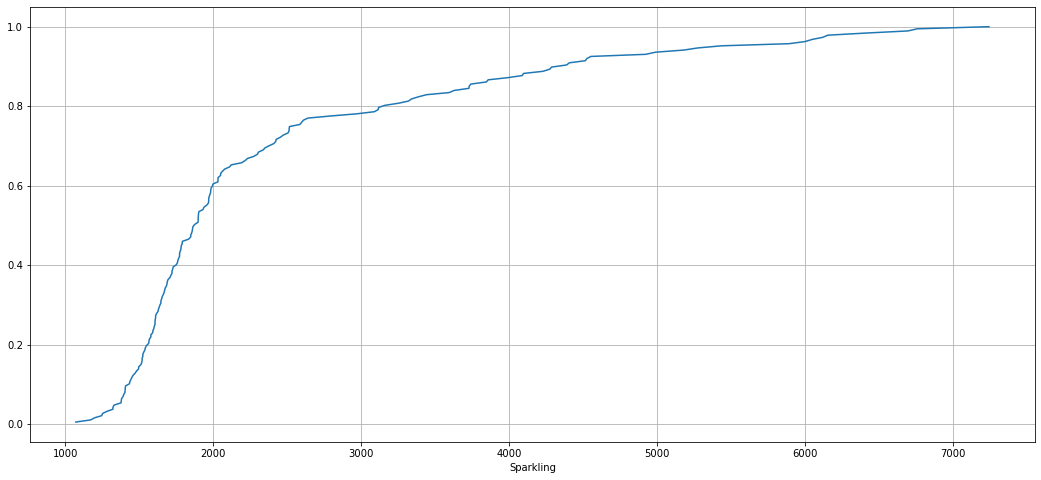

In [523]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_spark['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling');

### Plot the average Sales per month and the month on month percentage change of Sales.

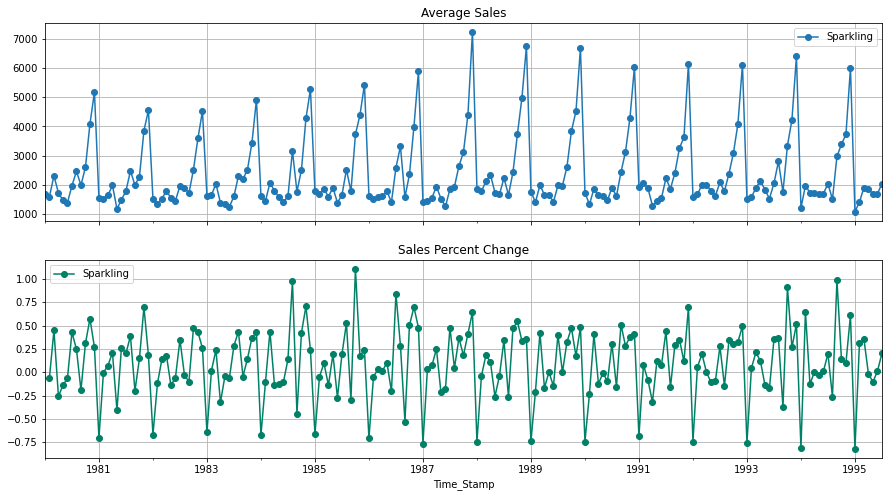

In [524]:
# group by date and get average RetailSales, and precent change
average    = df_spark.groupby(df_spark.index)["Sparkling"].mean()
pct_change = df_spark.groupby(df_spark.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

### Decompose the Time Series

Additive Model

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

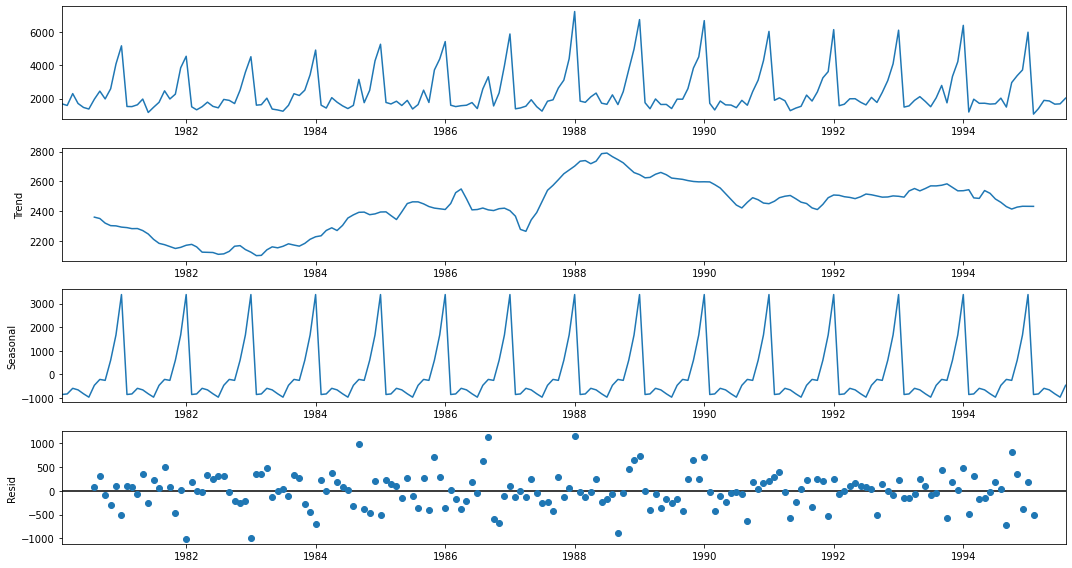

In [37]:
decomposition = seasonal_decompose(df_spark,model='additive')
decomposition.plot();

In [38]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [525]:
print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -854.260599
1980-02-29   -830.350678
1980-03-31   -592.356630
1980-04-30   -658.490559
1980-05-31   -824.416154
1980-06-30   -967.434011
1980-07-31   -465.502265
1980-08-31   -214.332821
1980-09-30   -254.677265
1980-10-31    599.769957
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.353290
Name: resid, dtype: float64 



Multiplicative Model

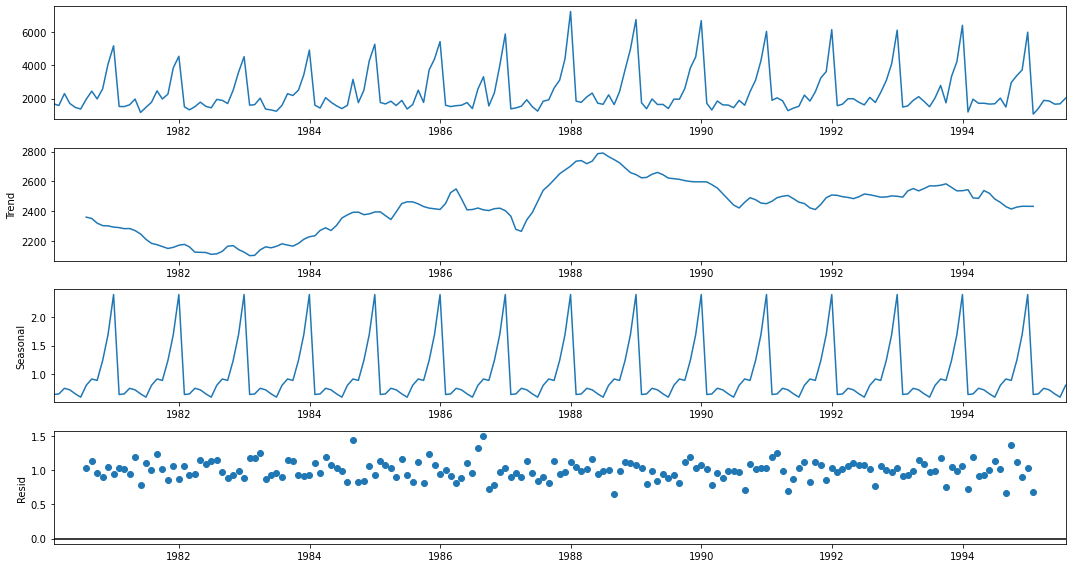

In [40]:
decomposition_m = seasonal_decompose(df_spark,model='multiplicative')
decomposition_m.plot();

In [41]:
trend_m = decomposition_m.trend
seasonality_m = decomposition_m.seasonal
residual_m = decomposition_m.resid

In [526]:
print('Trend','\n',trend_m.head(10),'\n')
print('Seasonality','\n',seasonality_m.head(10),'\n')
print('Residual','\n',residual_m.head(10),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
Name: resid, dtype: float64 



In [ ]:
trend[]

### 3. Split the data into training and test. The test data should start in 1991.

In [774]:
train = df_spark[df_spark.index<'1991'] 
test = df_spark[df_spark.index>='1991']

In [55]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [56]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

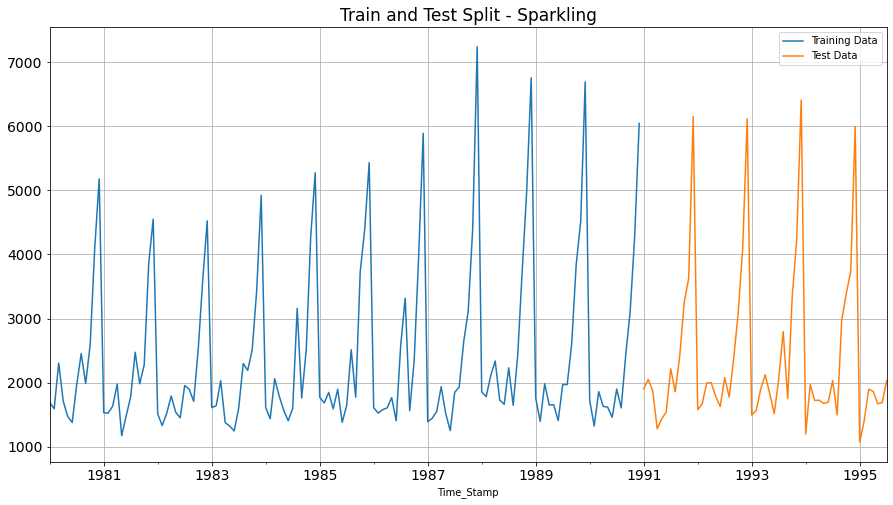

In [143]:
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Train and Test Split - Sparkling', fontsize=17)
plt.show()

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1:Linear Regression

In [899]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [900]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [901]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [902]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5

Last few rows of Training Data


Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132

First few rows of Test Data


Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137

Last few rows of Test Data


Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187

In [903]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [904]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

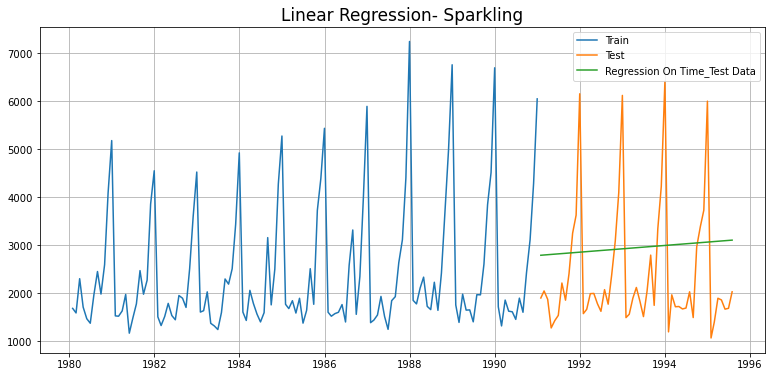

In [905]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title('Linear Regression- Sparkling', fontsize=17)
plt.grid();

Evaluate this model on the test data using Root Mean Squared Error (RMSE).

In [906]:
from sklearn import metrics

In [907]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [908]:
pd.DataFrame({'Test RMSE': round(rmse_model1_test,3)},index=['RegressionOnTime'])

Test RMSE
RegressionOnTime   1389.135

In [909]:
resultsDf = pd.DataFrame({'Test RMSE': round(rmse_model1_test,3)},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime   1389.135

### Model 2: Naive Approach

In [910]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [911]:
NaiveModel_train.tail()

Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [912]:
NaiveModel_test['naive'] = NaiveModel_train['Sparkling'][len(NaiveModel_train)-1]
NaiveModel_test[['Sparkling','naive']].head()

Sparkling  naive
Time_Stamp                  
1991-01-31       1902   6047
1991-02-28       2049   6047
1991-03-31       1874   6047
1991-04-30       1279   6047
1991-05-31       1432   6047

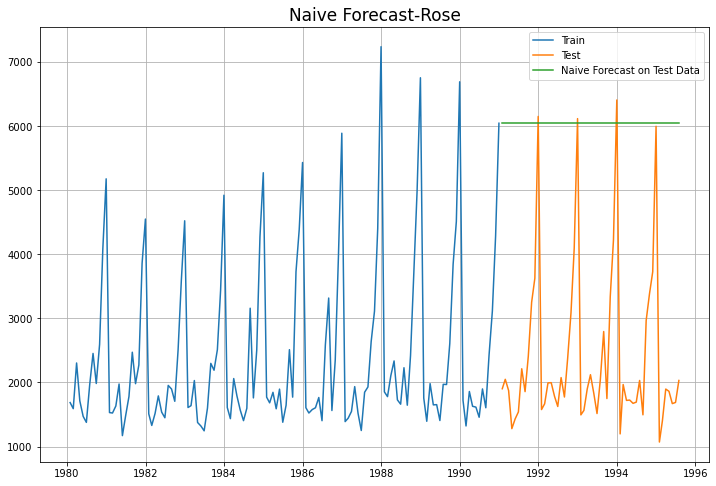

In [203]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast-Rose",fontsize=17)
plt.grid();

Model Evaluation

In [913]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive Model forecast on the Test Data,  RMSE is 3864.279


In [914]:
resultsDf2 = pd.DataFrame({'Test RMSE': round(rmse_model2_test,3)},index=['NaiveModel'])
resultsDf2

Test RMSE
NaiveModel   3864.279

In [915]:

resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

Test RMSE
RegressionOnTime   1389.135
NaiveModel         3864.279

### Model 3: Simple Average

In [916]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [917]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

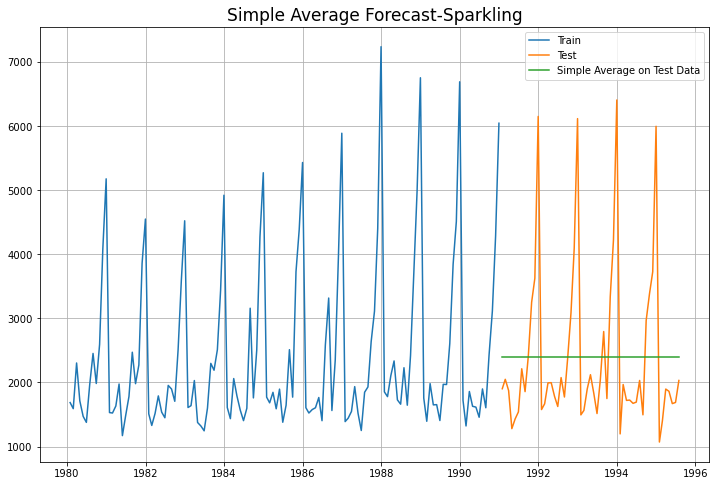

In [372]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast-Sparkling",fontsize=17)
plt.grid();

Model Evaluation

In [918]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [919]:
resultsDf3 = pd.DataFrame({'Test RMSE': round(rmse_model3_test,3)}
                           ,index=['SimpleAverageModel'])
resultsDf3

Test RMSE
SimpleAverageModel   1275.082

In [920]:
resultsDf = pd.concat([resultsDf, resultsDf3])
resultsDf

Test RMSE
RegressionOnTime     1389.135
NaiveModel           3864.279
SimpleAverageModel   1275.082

### Model 4: Moving Average(MA)

In [921]:
MovingAverage = df_spark.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [922]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time_Stamp                                                             
1980-01-31       1686         NaN         NaN          NaN          NaN
1980-02-29       1591      1638.5         NaN          NaN          NaN
1980-03-31       2304      1947.5         NaN          NaN          NaN
1980-04-30       1712      2008.0     1823.25          NaN          NaN
1980-05-31       1471      1591.5     1769.50          NaN          NaN
1980-06-30       1377      1424.0     1716.00  1690.166667          NaN
1980-07-31       1966      1671.5     1631.50  1736.833333          NaN
1980-08-31       2453      2209.5     1816.75  1880.500000          NaN
1980-09-30       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-31       2596      2290.0     2249.75  1974.500000  1939.333333

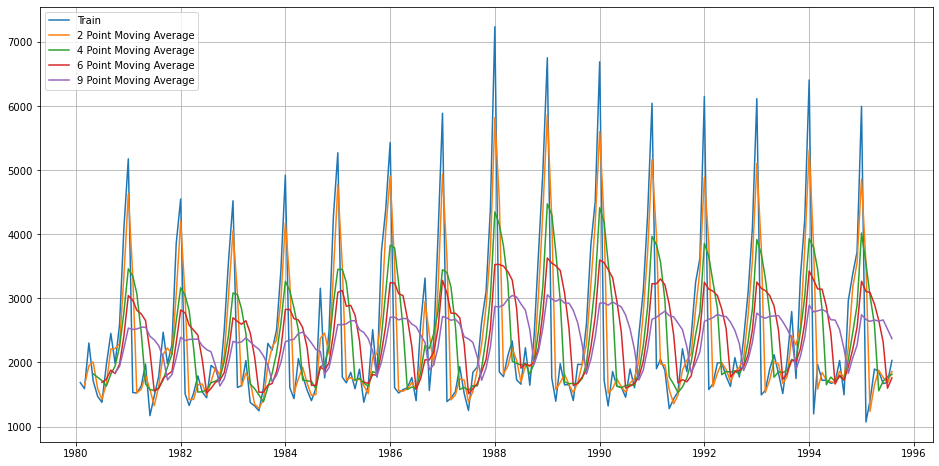

In [522]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [923]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

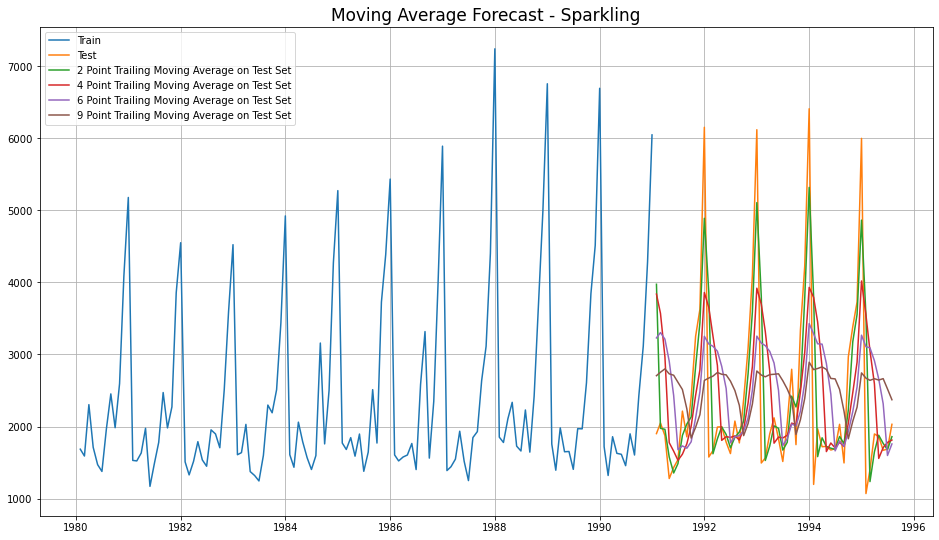

In [380]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Sparkling', fontsize=17);

Model Evaluation

Done only on the test data

In [924]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [925]:
resultsDf4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
round(resultsDf4,3)

Test RMSE
2pointTrailingMovingAverage    813.401
4pointTrailingMovingAverage   1156.590
6pointTrailingMovingAverage   1283.927
9pointTrailingMovingAverage   1346.278

In [926]:
resultsDf = pd.concat([resultsDf, round(resultsDf4,3)])
resultsDf

Test RMSE
RegressionOnTime              1389.135
NaiveModel                    3864.279
SimpleAverageModel            1275.082
2pointTrailingMovingAverage    813.401
4pointTrailingMovingAverage   1156.590
6pointTrailingMovingAverage   1283.927
9pointTrailingMovingAverage   1346.278

### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

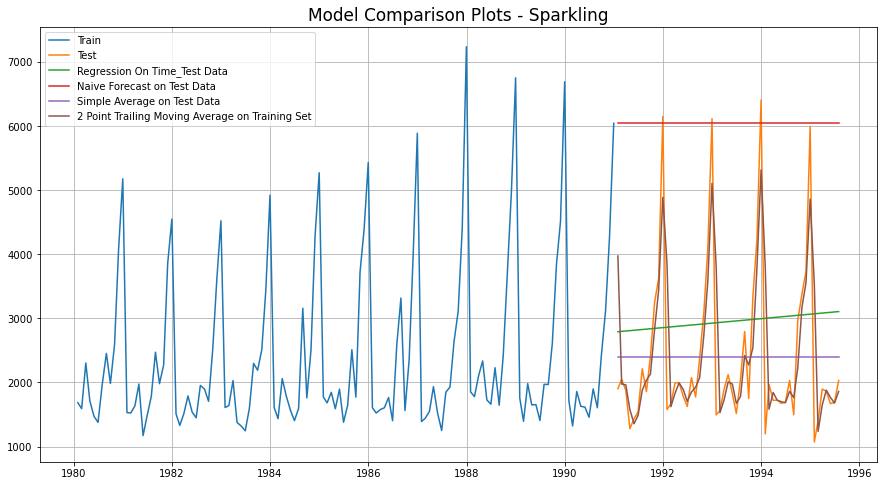

In [389]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling",fontsize=17)
plt.grid();

### Model 5: Simple Exponential Smoothing

In [927]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [928]:
SES_train = train.copy()
SES_test = test.copy()

In [929]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])
model_SES_autofit = model_SES.fit(optimized=True)

In [930]:
model_SES_autofit.params_formatted

name        param  optimized
smoothing_level  alpha     0.049607       True
initial_level      l.0  2151.614314       True

In [931]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2725.336037
1991-02-28       2049  2725.336037
1991-03-31       1874  2725.336037
1991-04-30       1279  2725.336037
1991-05-31       1432  2725.336037

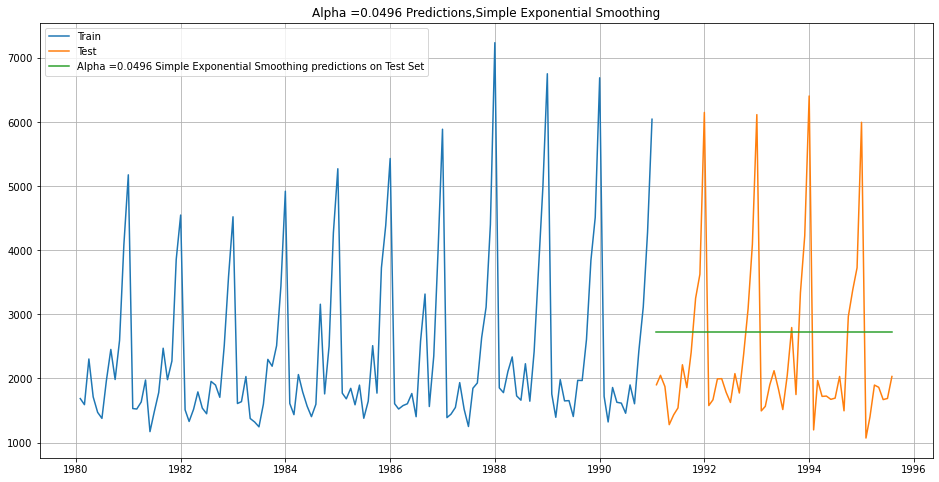

In [224]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0496 Predictions,Simple Exponential Smoothing');

Model Evaluation for 𝛼 = 0.0496 : Simple Exponential Smoothing

In [932]:
## Test Data

rmse_model5_test = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test))

For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.135


In [933]:
resultsDf5 = pd.DataFrame({'Test RMSE': round(rmse_model5_test,3)}
                              ,index=['Alpha=0.0496:SimpleExponentialSmoothing'])
resultsDf5

Test RMSE
Alpha=0.0496:SimpleExponentialSmoothing   1316.135

In [934]:
resultsDf = pd.concat([resultsDf, resultsDf5])
resultsDf

Test RMSE
RegressionOnTime                          1389.135
NaiveModel                                3864.279
SimpleAverageModel                        1275.082
2pointTrailingMovingAverage                813.401
4pointTrailingMovingAverage               1156.590
6pointTrailingMovingAverage               1283.927
9pointTrailingMovingAverage               1346.278
Alpha=0.0496:SimpleExponentialSmoothing   1316.135

### Model 6: Simple Exponential Smoothing(𝛼 = 0.1)

Setting different alpha values

In [935]:
resultsDf_m = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_m

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [936]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model7_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model7_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_m = resultsDf_m.append({'Alpha Values':i,'Train RMSE':rmse_model7_train_i 
                                      ,'Test RMSE':rmse_model7_test_i}, ignore_index=True)

In [937]:
resultsDf_m.sort_values(by='Test RMSE',ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.1  1333.873836  1375.393398
1           0.2  1356.042987  1595.206839
2           0.3  1359.511747  1935.507132
3           0.4  1352.588879  2311.919615
4           0.5  1344.004369  2666.351413
5           0.6  1338.805381  2979.204388
6           0.7  1338.844308  3249.944092
7           0.8  1344.462091  3483.801006
8           0.9  1355.723518  3686.794285

In [601]:
SES_test.head()

Sparkling      predict  (predict, 0.1)  (predict, 0.2)  \
Time_Stamp                                                           
1991-01-31       1902  2725.336037     2914.795408     3357.723951   
1991-02-28       2049  2725.336037     2914.795408     3357.723951   
1991-03-31       1874  2725.336037     2914.795408     3357.723951   
1991-04-30       1279  2725.336037     2914.795408     3357.723951   
1991-05-31       1432  2725.336037     2914.795408     3357.723951   

            (predict, 0.30000000000000004)  (predict, 0.4)  (predict, 0.5)  \
Time_Stamp                                                                   
1991-01-31                     3855.296454     4327.657882     4740.858018   
1991-02-28                     3855.296454     4327.657882     4740.858018   
1991-03-31                     3855.296454     4327.657882     4740.858018   
1991-04-30                     3855.296454     4327.657882     4740.858018   
1991-05-31                     3855.296454     4327.657882     4740.858018   

            (predict, 0.6)  (predict, 0.7000000000000001)  (predict, 0.8)  \
Time_Stamp                                                                  
1991-01-31     5091.699384                    5388.514029     5641.221537   
1991-02-28     5091.699384                    5388.514029     5641.221537   
1991-03-31     5091.699384                    5388.514029     5641.221537   
1991-04-30     5091.699384                    5388.514029     5641.221537   
1991-05-31     5091.699384                    5388.514029     5641.221537   

            (predict, 0.9)  
Time_Stamp                  
1991-01-31     5858.428614  
1991-02-28     5858.428614  
1991-03-31     5858.428614  
1991-04-30     5858.428614  
1991-05-31     5858.428614

In [938]:
temp_resultsDf_ses = pd.DataFrame({'Test RMSE': [resultsDf_m.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

round(temp_resultsDf_ses,3)

Test RMSE
Alpha=0.1,SimpleExponentialSmoothing   1375.393

In [939]:
resultsDf = pd.concat([resultsDf, round(temp_resultsDf_ses,3)])
resultsDf

Test RMSE
RegressionOnTime                          1389.135
NaiveModel                                3864.279
SimpleAverageModel                        1275.082
2pointTrailingMovingAverage                813.401
4pointTrailingMovingAverage               1156.590
6pointTrailingMovingAverage               1283.927
9pointTrailingMovingAverage               1346.278
Alpha=0.0496:SimpleExponentialSmoothing   1316.135
Alpha=0.1,SimpleExponentialSmoothing      1375.393

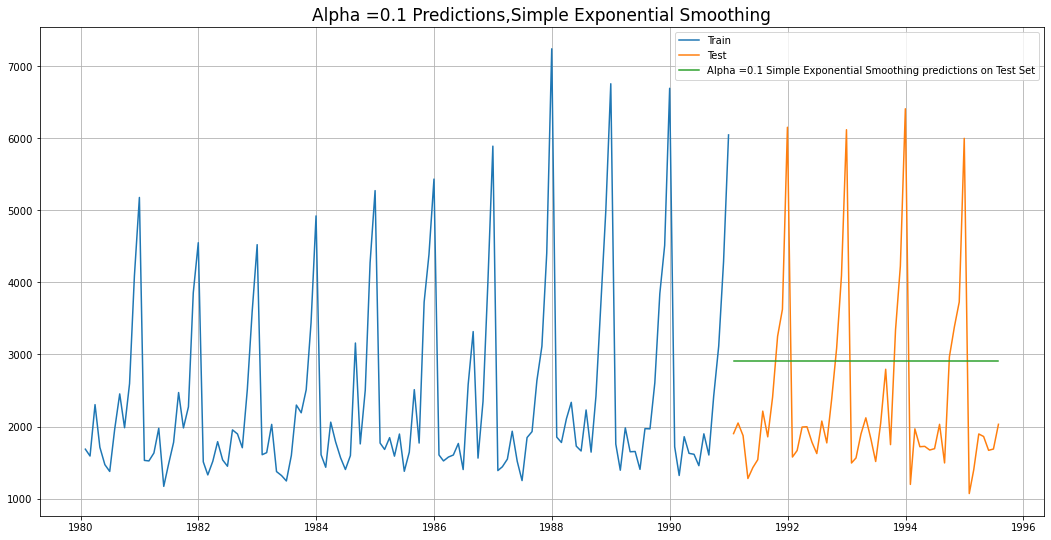

In [604]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

#plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.title('Alpha =0.1 Predictions,Simple Exponential Smoothing',fontsize=17);
plt.grid();

### Model 7: Double Exponential Smoothing (Holt's Model)

In [945]:
DES_train = train.copy()
DES_test = test.copy()

In [946]:
model_DES = Holt(DES_train['Sparkling'])
model_DES_autofit = model_DES.fit(optimized=True)

In [947]:
model_DES_autofit.params_formatted

name        param  optimized
smoothing_level  alpha     0.688571       True
smoothing_trend   beta     0.000100       True
initial_level      l.0  1686.000000       True
initial_trend      b.0   -95.000000       True

In [949]:
DES_test['predict_test']=  model_DES_autofit.forecast(steps=len(DES_test))
DES_test.head()

Sparkling  predict_test
Time_Stamp                         
1991-01-31       1902   5221.278699
1991-02-28       2049   5127.886554
1991-03-31       1874   5034.494409
1991-04-30       1279   4941.102264
1991-05-31       1432   4847.710119

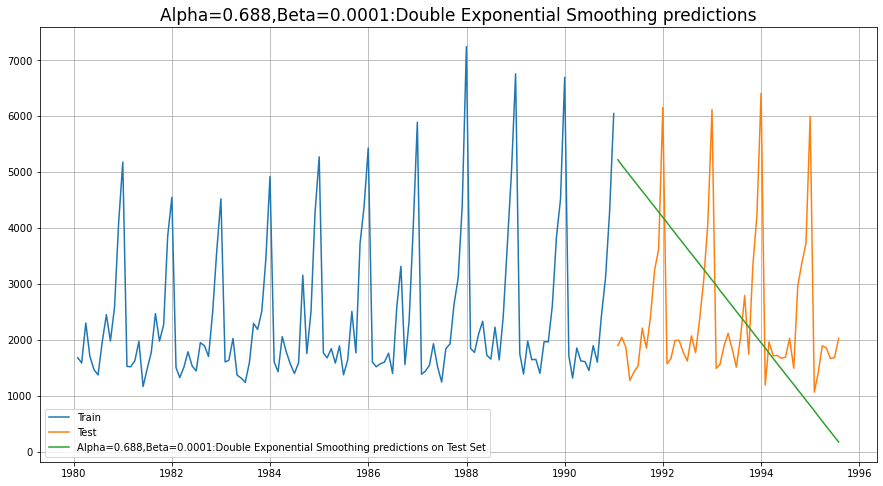

In [950]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict_test'], label='Alpha=0.688,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha=0.688,Beta=0.0001:Double Exponential Smoothing predictions', fontsize=17);

In [951]:
## Test Data - RMSE

rmse_model6_test = metrics.mean_squared_error(test['Sparkling'],DES_test['predict_test'],squared=False)
print("For Alpha=0.688,Beta=0.0001:Double Exponential Smoothing predictions forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test))

For Alpha=0.688,Beta=0.0001:Double Exponential Smoothing predictions forecast on the Test Data,  RMSE is 2007.239


In [952]:
resultsDf6 = pd.DataFrame({'Test RMSE': round(rmse_model6_test,3)}
                              ,index=['Alpha=0.688,Beta=0.0001 :DoubleExponentialSmoothing'])

resultsDf6

Test RMSE
Alpha=0.688,Beta=0.0001 :DoubleExponentialSmoot...   2007.239

In [953]:
resultsDf = pd.concat([resultsDf, resultsDf6])
resultsDf

Test RMSE
RegressionOnTime                                     1389.135
NaiveModel                                           3864.279
SimpleAverageModel                                   1275.082
2pointTrailingMovingAverage                           813.401
4pointTrailingMovingAverage                          1156.590
6pointTrailingMovingAverage                          1283.927
9pointTrailingMovingAverage                          1346.278
Alpha=0.0496:SimpleExponentialSmoothing              1316.135
Alpha=0.1,SimpleExponentialSmoothing                 1375.393
Alpha=0.688,Beta=0.0001 :DoubleExponentialSmoot...   2007.239

### Model 8: Double Exponential Smoothing (Holt's Model) (with 𝛼 =0.1, 𝛽 =0.1)

Setting different alpha values

In [954]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_m1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_m1

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [955]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model8_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model8_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_m1 = resultsDf_m1.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model8_train
                                          ,'Test RMSE':rmse_model8_test}, ignore_index=True)

In [956]:
resultsDf_m1.sort_values(by='Test RMSE',ascending=True).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.1          0.1  1382.520870  1778.564670
1            0.1          0.2  1413.598835  2599.439986
9            0.2          0.1  1418.041591  3611.763322
2            0.1          0.3  1445.762015  4293.084674
18           0.3          0.1  1431.169601  5908.185554

In [957]:
temp_resultsDf_des = pd.DataFrame({'Test RMSE': [resultsDf_m1.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.1&Beta=0.1,DoubleExponentialSmoothing'])

round(temp_resultsDf_des,3)

Test RMSE
Alpha=0.1&Beta=0.1,DoubleExponentialSmoothing   1778.565

In [958]:
resultsDf = pd.concat([resultsDf, round(temp_resultsDf_des,3)])
resultsDf

Test RMSE
RegressionOnTime                                     1389.135
NaiveModel                                           3864.279
SimpleAverageModel                                   1275.082
2pointTrailingMovingAverage                           813.401
4pointTrailingMovingAverage                          1156.590
6pointTrailingMovingAverage                          1283.927
9pointTrailingMovingAverage                          1346.278
Alpha=0.0496:SimpleExponentialSmoothing              1316.135
Alpha=0.1,SimpleExponentialSmoothing                 1375.393
Alpha=0.688,Beta=0.0001 :DoubleExponentialSmoot...   2007.239
Alpha=0.1&Beta=0.1,DoubleExponentialSmoothing        1778.565

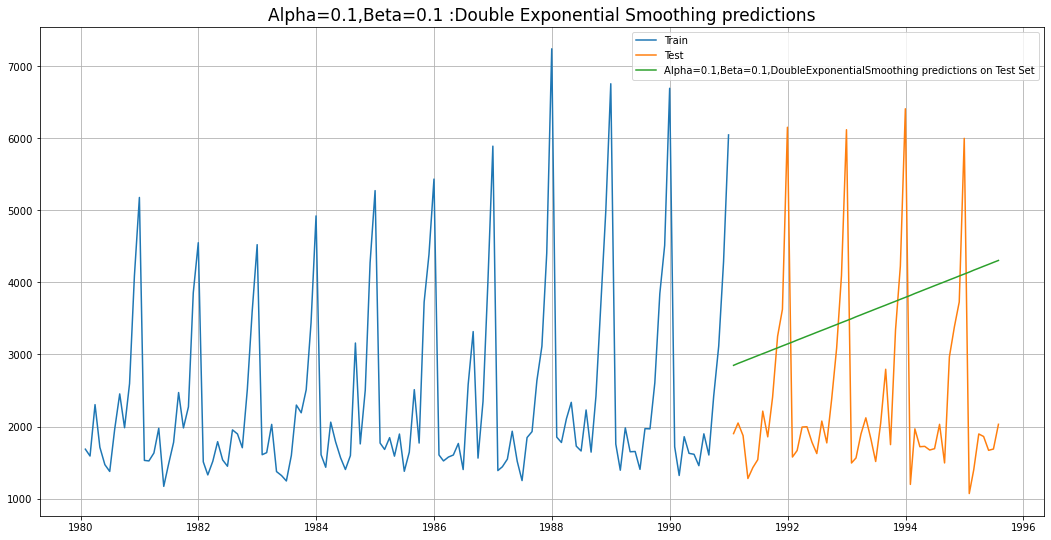

In [626]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

#plt.plot(DES_test['predict_test'], label='Alpha=0.688,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Alpha=0.1,Beta=0.1 :Double Exponential Smoothing predictions', fontsize=17);
plt.grid();

### Model 9: Triple Exponential Smoothing (Holt - Winter's Model)(𝛼 =0.676 , 𝛽 =0.088 & 𝛾=0.323)

In [959]:
TES_train = train.copy()
TES_test = test.copy()

In [960]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [961]:
model_TES_autofit = model_TES.fit(optimized=True)

In [962]:
model_TES_autofit.params_formatted

name        param  optimized
smoothing_level     alpha     0.111088       True
smoothing_trend      beta     0.061712       True
smoothing_seasonal  gamma     0.395081       True
initial_level         l.0  1639.908836       True
initial_trend         b.0   -11.928144       True
initial_seasons.0     s.0     1.050650       True
initial_seasons.1     s.1     1.020862       True
initial_seasons.2     s.2     1.410785       True
initial_seasons.3     s.3     1.202635       True
initial_seasons.4     s.4     0.973152       True
initial_seasons.5     s.5     0.966894       True
initial_seasons.6     s.6     1.317243       True
initial_seasons.7     s.7     1.704716       True
initial_seasons.8     s.8     1.372897       True
initial_seasons.9     s.9     1.810350       True
initial_seasons.10   s.10     2.839627       True
initial_seasons.11   s.11     3.609973       True

In [963]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1577.208163
1991-02-28       2049   1333.663154
1991-03-31       1874   1745.977341
1991-04-30       1279   1630.435405
1991-05-31       1432   1523.306429

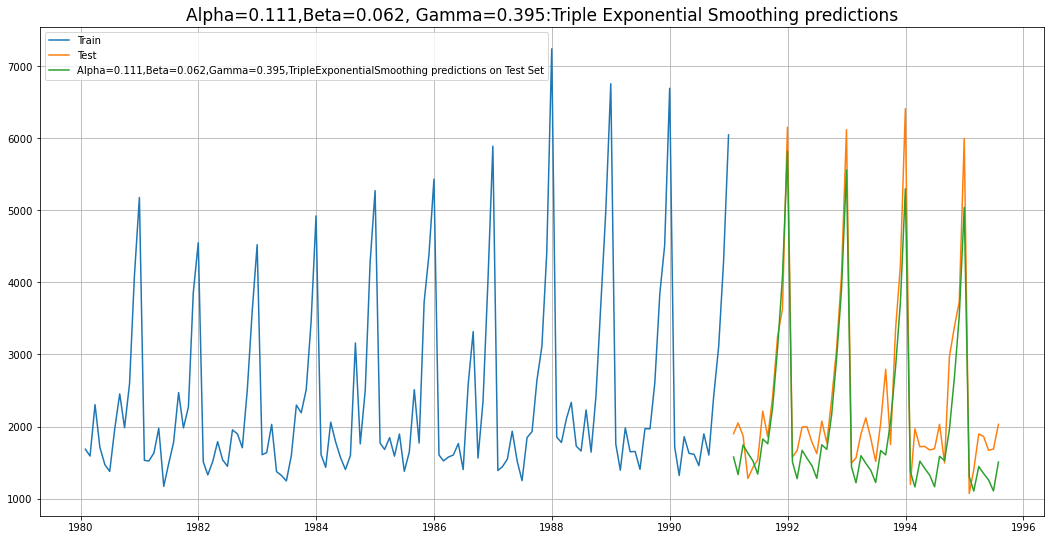

In [452]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Alpha=0.111,Beta=0.062, Gamma=0.395:Triple Exponential Smoothing predictions', fontsize=17);
plt.grid();

In [964]:
## Test Data - RMSE

rmse_model7_test = metrics.mean_squared_error(test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExponentialSmoothing predictions forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test))

For Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExponentialSmoothing predictions forecast on the Test Data,  RMSE is 469.659


In [965]:
temp_resultsDf7 = pd.DataFrame({'Test RMSE': round(rmse_model7_test,3)}
                              ,index=['Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExponentialSmoothing'])

temp_resultsDf7

Test RMSE
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...    469.659

In [966]:
resultsDf = pd.concat([resultsDf, temp_resultsDf7])
resultsDf

Test RMSE
RegressionOnTime                                     1389.135
NaiveModel                                           3864.279
SimpleAverageModel                                   1275.082
2pointTrailingMovingAverage                           813.401
4pointTrailingMovingAverage                          1156.590
6pointTrailingMovingAverage                          1283.927
9pointTrailingMovingAverage                          1346.278
Alpha=0.0496:SimpleExponentialSmoothing              1316.135
Alpha=0.1,SimpleExponentialSmoothing                 1375.393
Alpha=0.688,Beta=0.0001 :DoubleExponentialSmoot...   2007.239
Alpha=0.1&Beta=0.1,DoubleExponentialSmoothing        1778.565
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...    469.659

### Model 10: Triple Exponential Smoothing (Holt - Winter's Model) (𝛼 =0.4 , 𝛽 =0.1 & 𝛾=0.2)

In [967]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_m2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_m2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [968]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test))
        
            rmse_model10_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model10_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_m2 = resultsDf_m2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model10_train,'Test RMSE':rmse_model10_test}
                                                 , ignore_index=True)

In [969]:
resultsDf_m2.sort_values(by='Test RMSE',ascending=True).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
244           0.4          0.1           0.2  389.772245  336.715250
172           0.3          0.2           0.2  395.529174  350.145204
90            0.2          0.2           0.1  405.333164  352.571689
162           0.3          0.1           0.1  394.630053  352.607849
18            0.1          0.3           0.1  414.423963  354.534561

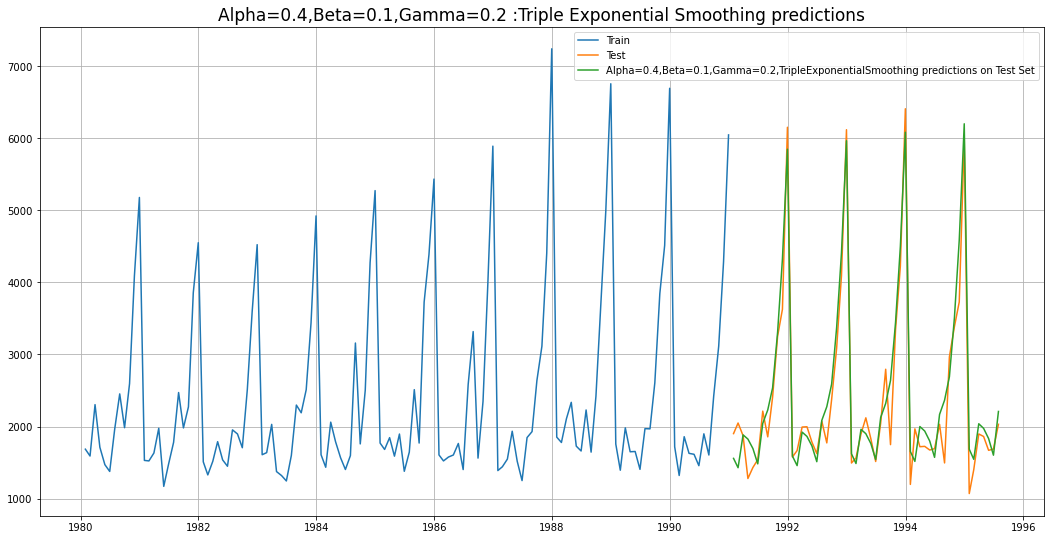

In [641]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Alpha=0.4,Beta=0.1,Gamma=0.2 :Triple Exponential Smoothing predictions', fontsize=17);
plt.grid();

In [970]:
temp_resultsDf_tes = pd.DataFrame({'Test RMSE': [resultsDf_m2.sort_values(by=['Test RMSE'],ascending=True).values[0][4]]}
                              ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2:TripleExponentialSmoothing'])

round(temp_resultsDf_tes,3)

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2:TripleExponentialS...    336.715

In [971]:
resultsDf = pd.concat([resultsDf, round(temp_resultsDf_tes,3)])
resultsDf

Test RMSE
RegressionOnTime                                     1389.135
NaiveModel                                           3864.279
SimpleAverageModel                                   1275.082
2pointTrailingMovingAverage                           813.401
4pointTrailingMovingAverage                          1156.590
6pointTrailingMovingAverage                          1283.927
9pointTrailingMovingAverage                          1346.278
Alpha=0.0496:SimpleExponentialSmoothing              1316.135
Alpha=0.1,SimpleExponentialSmoothing                 1375.393
Alpha=0.688,Beta=0.0001 :DoubleExponentialSmoot...   2007.239
Alpha=0.1&Beta=0.1,DoubleExponentialSmoothing        1778.565
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...    469.659
Alpha=0.4,Beta=0.1,Gamma=0.2:TripleExponentialS...    336.715

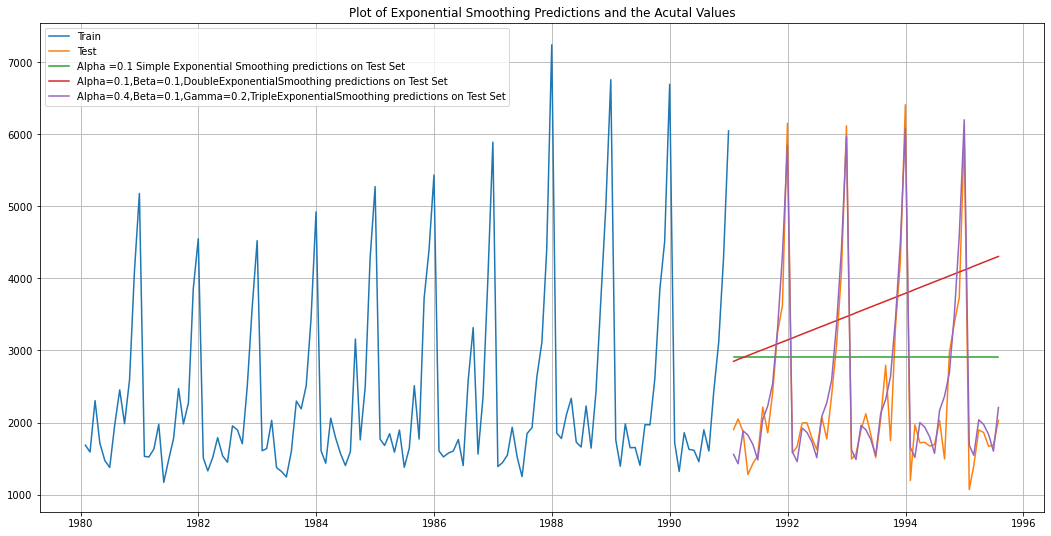

In [644]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [972]:
resultsDf.sort_values(by='Test RMSE',ascending=True)

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2:TripleExponentialS...    336.715
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...    469.659
2pointTrailingMovingAverage                           813.401
4pointTrailingMovingAverage                          1156.590
SimpleAverageModel                                   1275.082
6pointTrailingMovingAverage                          1283.927
Alpha=0.0496:SimpleExponentialSmoothing              1316.135
9pointTrailingMovingAverage                          1346.278
Alpha=0.1,SimpleExponentialSmoothing                 1375.393
RegressionOnTime                                     1389.135
Alpha=0.1&Beta=0.1,DoubleExponentialSmoothing        1778.565
Alpha=0.688,Beta=0.0001 :DoubleExponentialSmoot...   2007.239
NaiveModel                                           3864.279

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

Checking Stationarity

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

$\alpha$ = 0.05

In [973]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

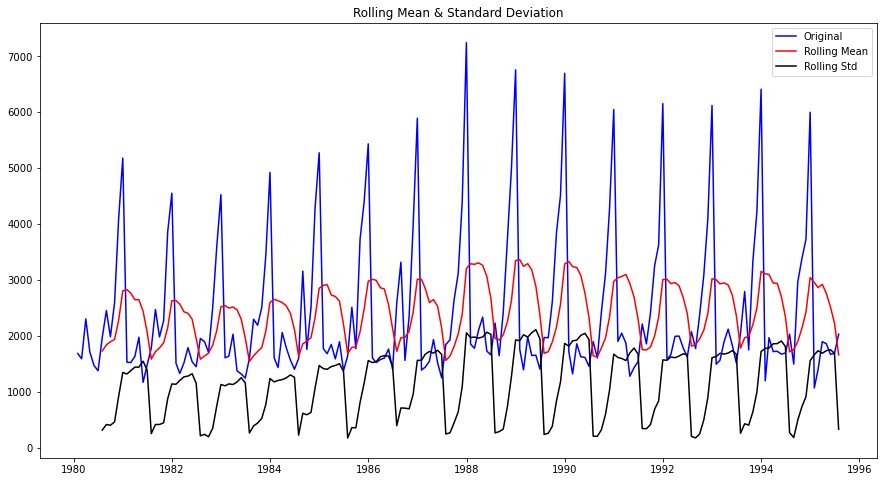

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [974]:
test_stationarity(df_spark['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

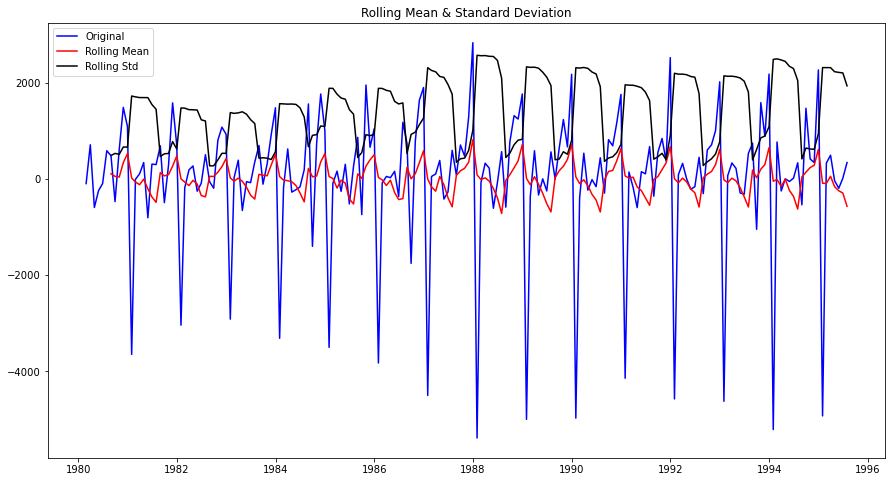

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [975]:
test_stationarity(df_spark['Sparkling'].diff().dropna())

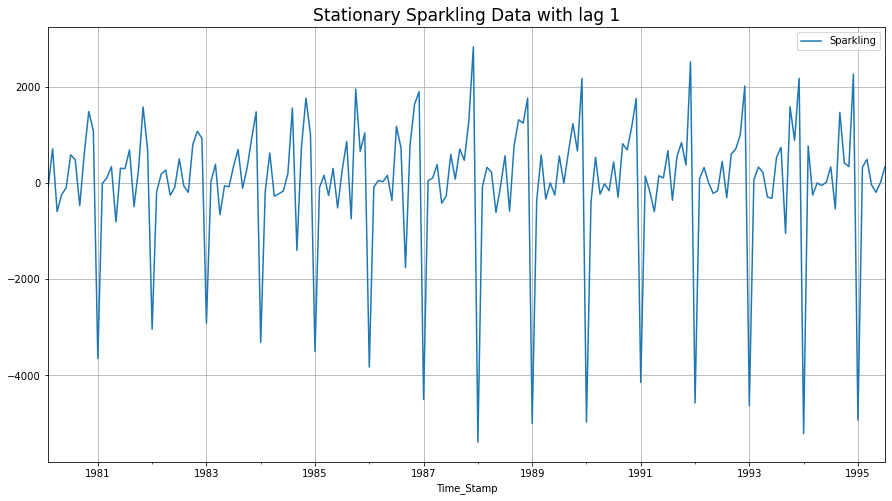

In [976]:
df_spark.diff().dropna().plot(grid=True);
plt.title('Stationary Sparkling Data with lag 1', fontsize=17);

We see that at  𝛼  = 0.05 the Time Series is indeed stationary

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [845]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

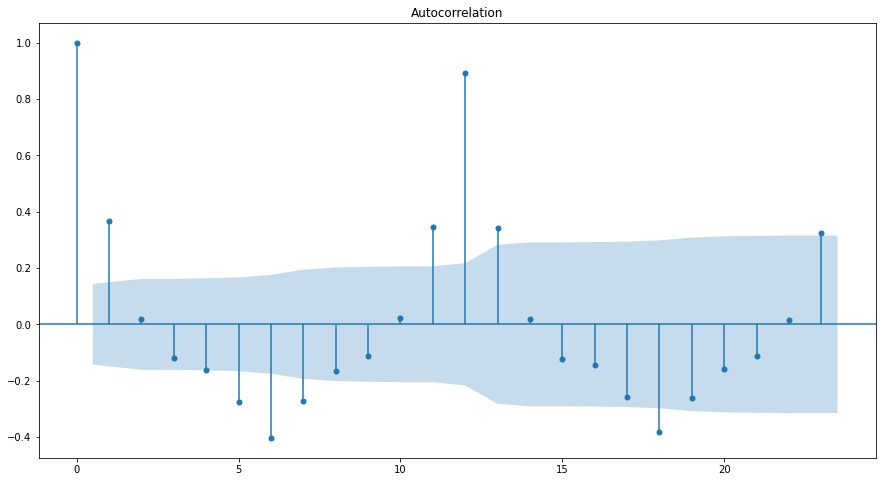

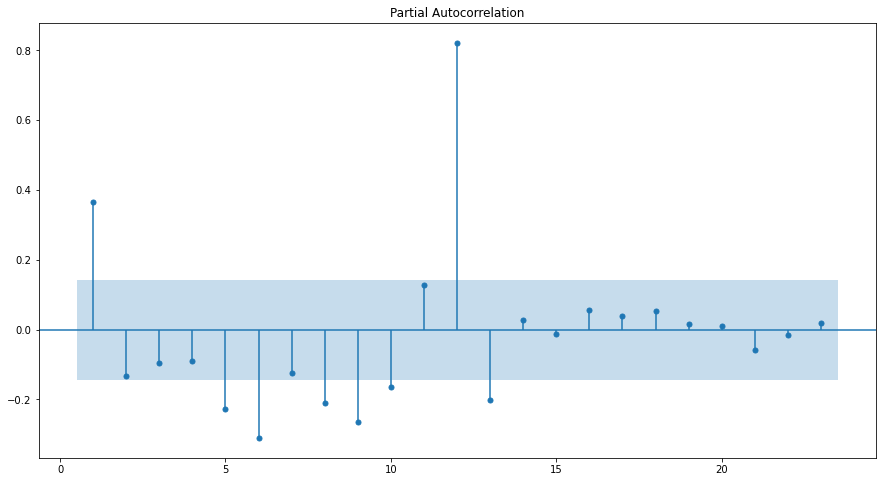

In [651]:
plot_acf(df_spark,alpha=0.05);
plot_pacf(df_spark,zero=False,alpha=0.05,method='ywmle');

p=1 q=1

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Check for stationarity of the Training Data Time Series

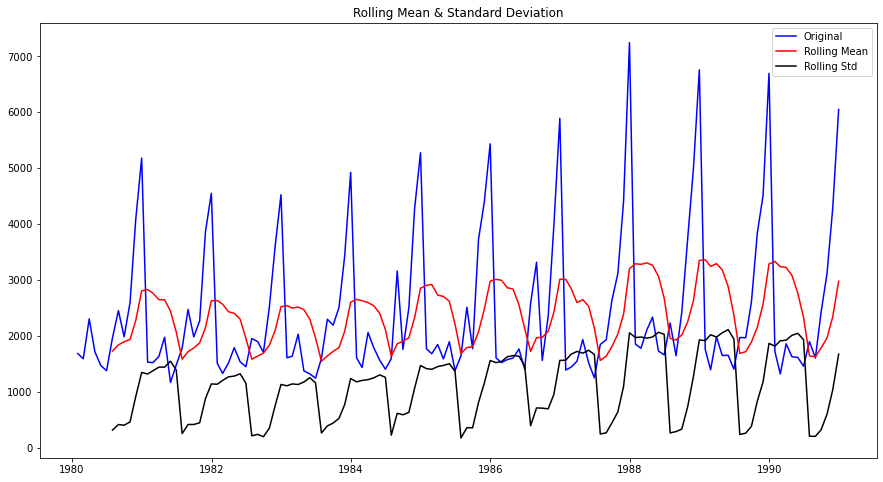

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [977]:
test_stationarity(train['Sparkling'])

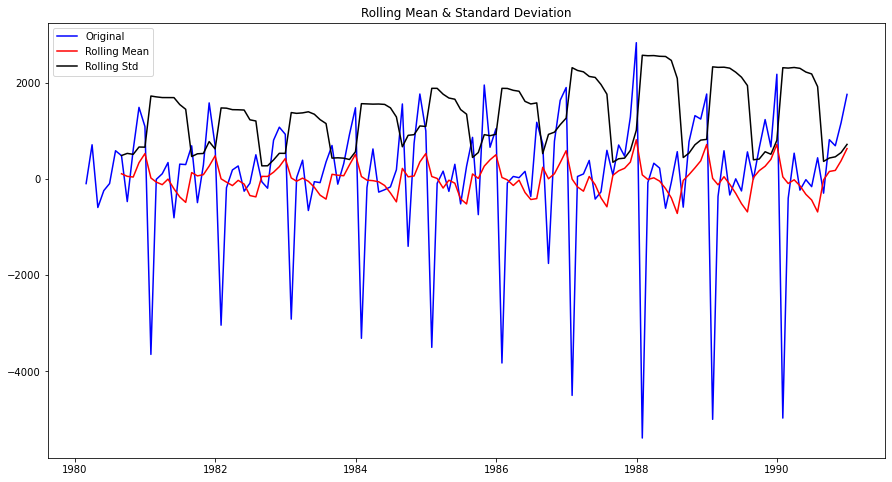

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [978]:
test_stationarity(train['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at 𝛼 = 0.05

Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [270]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


### Building an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [979]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [980]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [981]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015592133
ARIMA(0, 1, 2) - AIC:2234.4083231291497
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946704996
ARIMA(1, 1, 2) - AIC:2234.5272004521435
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626308103
ARIMA(2, 1, 2) - AIC:2213.5092123973454


In [982]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
8  (2, 1, 2)  2213.509212
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095

In [983]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 19 Mar 2022   AIC                           2213.509
Time:                        22:07:09   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

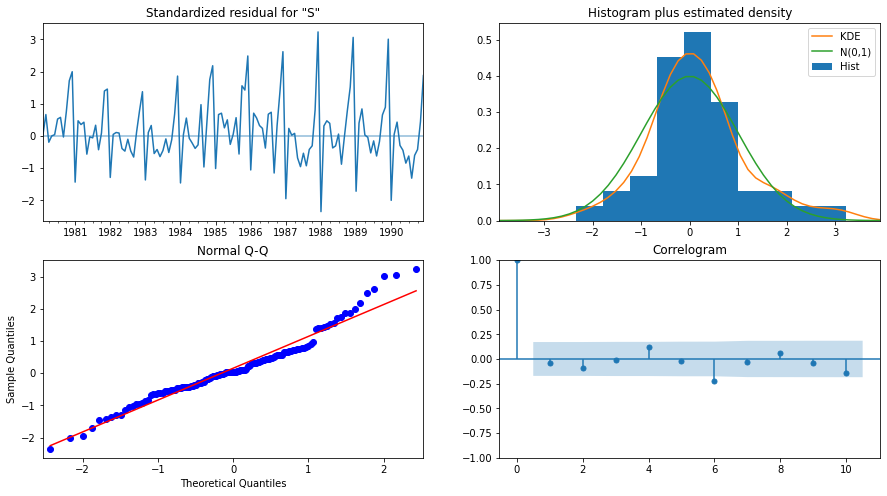

In [659]:
results_auto_ARIMA.plot_diagnostics();

### Predict on the Test Set using this model and evaluate the model.

In [984]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [985]:
from sklearn.metrics import  mean_squared_error
rmse1 = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print('RMSE for ARIMA(2,1,2) based on AIC value is:',round(rmse1,3))

RMSE for ARIMA(2,1,2) based on AIC value is: 1299.98


In [986]:
rmse_arima = pd.DataFrame({'Test RMSE': round(rmse1,3)}
                              ,index=['ARIMA(2,1,2) based on AIC value'])

rmse_arima

Test RMSE
ARIMA(2,1,2) based on AIC value    1299.98

In [987]:
resultsDf = pd.concat([resultsDf, rmse_arima])
resultsDf

Test RMSE
RegressionOnTime                                     1389.135
NaiveModel                                           3864.279
SimpleAverageModel                                   1275.082
2pointTrailingMovingAverage                           813.401
4pointTrailingMovingAverage                          1156.590
6pointTrailingMovingAverage                          1283.927
9pointTrailingMovingAverage                          1346.278
Alpha=0.0496:SimpleExponentialSmoothing              1316.135
Alpha=0.1,SimpleExponentialSmoothing                 1375.393
Alpha=0.688,Beta=0.0001 :DoubleExponentialSmoot...   2007.239
Alpha=0.1&Beta=0.1,DoubleExponentialSmoothing        1778.565
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...    469.659
Alpha=0.4,Beta=0.1,Gamma=0.2:TripleExponentialS...    336.715
ARIMA(2,1,2) based on AIC value                      1299.980

### Building an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

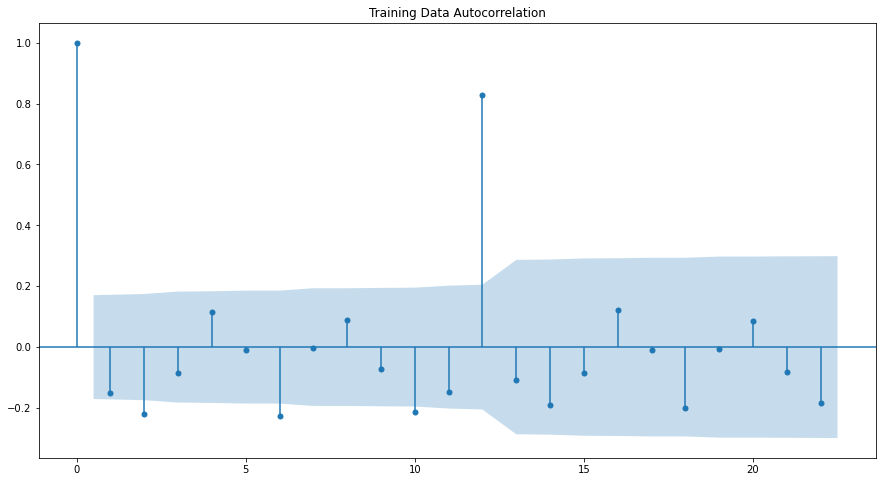

In [988]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

We see that there can be a seasonality of 12. We will run auto SARIMA models by setting seasonality as 12.

In [989]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [990]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [991]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616845315
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236032
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389776
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791726
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158604901
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.989805392084
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566435
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572999903
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881837643
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319380044
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144560762
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954179886
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084042036
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018823976103
SARIMA(0, 1, 2

In [992]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934564
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121565
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [993]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1,0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sat, 19 Mar 2022   AIC                           1555.584
Time:                                    22:09:53   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

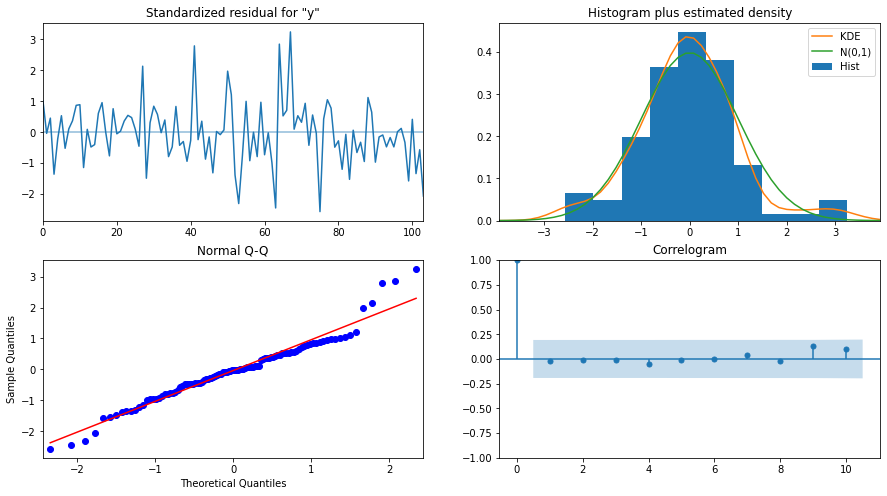

In [671]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [994]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [995]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.385682  388.343707     566.246002    2088.525361
1  1315.127259  402.007354     527.207323    2103.047194
2  1621.591592  402.000958     833.684193    2409.498992
3  1598.879086  407.238889     800.705530    2397.052642
4  1392.693371  407.968895     593.089030    2192.297712

In [996]:
rmse2 = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print('RMSE for SARIMA(1,1,2)(1,0,2,12)based on AIC value',round(rmse2,3))

RMSE for SARIMA(1,1,2)(1,0,2,12)based on AIC value 528.607


In [997]:
rmse_sarima = pd.DataFrame({'Test RMSE': round(rmse2,3)}
                              ,index=['SARIMA(1,1,2)(1,0,2,12)based on AIC value'])

rmse_sarima

Test RMSE
SARIMA(1,1,2)(1,0,2,12)based on AIC value    528.607

In [998]:
resultsDf = pd.concat([resultsDf, rmse_sarima])
resultsDf

Test RMSE
RegressionOnTime                                     1389.135
NaiveModel                                           3864.279
SimpleAverageModel                                   1275.082
2pointTrailingMovingAverage                           813.401
4pointTrailingMovingAverage                          1156.590
6pointTrailingMovingAverage                          1283.927
9pointTrailingMovingAverage                          1346.278
Alpha=0.0496:SimpleExponentialSmoothing              1316.135
Alpha=0.1,SimpleExponentialSmoothing                 1375.393
Alpha=0.688,Beta=0.0001 :DoubleExponentialSmoot...   2007.239
Alpha=0.1&Beta=0.1,DoubleExponentialSmoothing        1778.565
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...    469.659
Alpha=0.4,Beta=0.1,Gamma=0.2:TripleExponentialS...    336.715
ARIMA(2,1,2) based on AIC value                      1299.980
SARIMA(1,1,2)(1,0,2,12)based on AIC value             528.607

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## Building a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

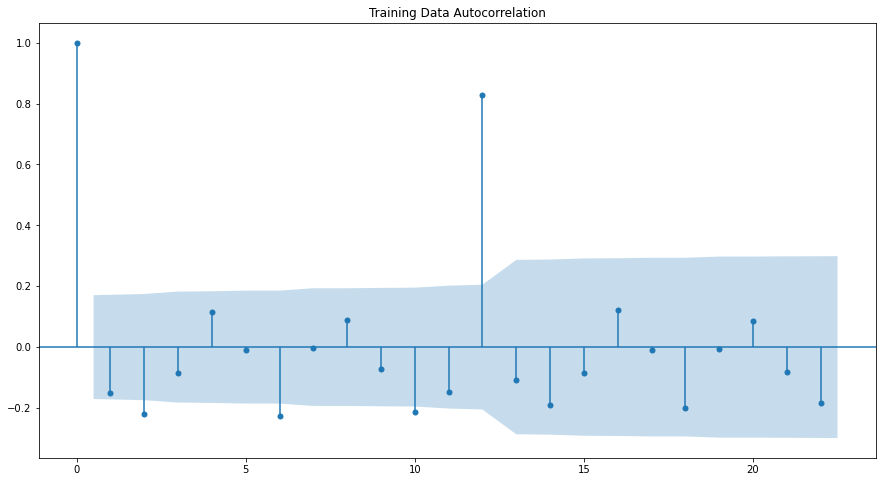

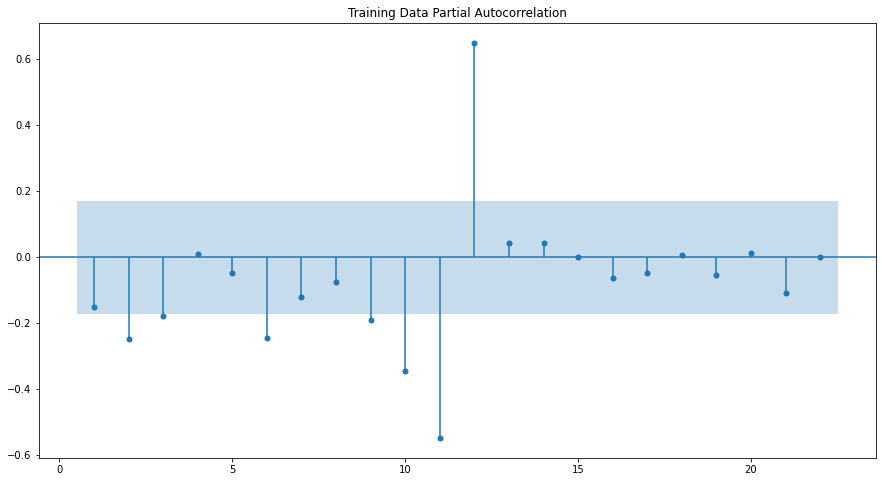

In [999]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [1000]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sat, 19 Mar 2022   AIC                           2267.663
Time:                        22:10:20   BIC                           2270.538
Sample:                    01-31-1980   HQIC                          2268.831
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

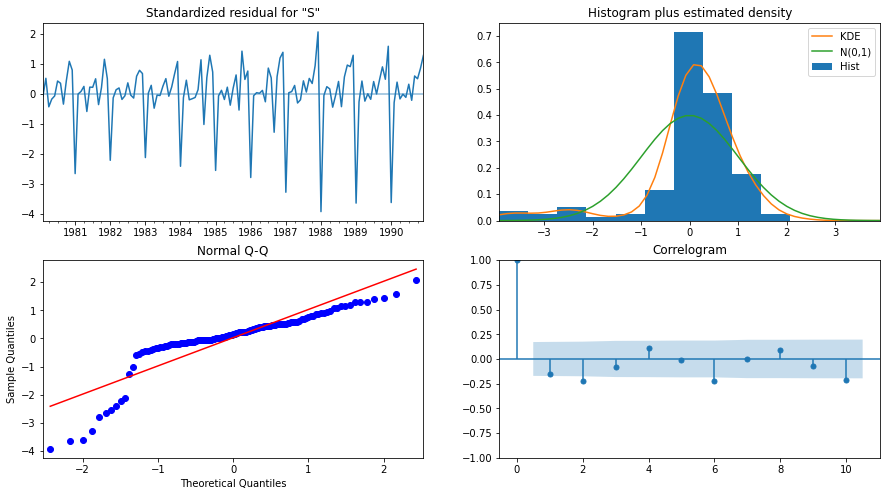

In [678]:
results_manual_ARIMA.plot_diagnostics();

We get a comparatively simpler model by looking at the ACF and the PACF plots.

In [1001]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [1002]:
rmse3 = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print('RMSE for manual ARIMA(0,1,0) is:',round(rmse3,3))

RMSE for manual ARIMA(0,1,0) is: 3864.279


In [1003]:
rmse_manual_arima = pd.DataFrame({'Test RMSE': round(rmse3,3)}
                              ,index=['ARIMA(0,1,0)based on ACF & PACF values'])

rmse_manual_arima

Test RMSE
ARIMA(0,1,0)based on ACF & PACF values   3864.279

In [1004]:
resultsDf = pd.concat([resultsDf, rmse_manual_arima])
resultsDf

Test RMSE
RegressionOnTime                                     1389.135
NaiveModel                                           3864.279
SimpleAverageModel                                   1275.082
2pointTrailingMovingAverage                           813.401
4pointTrailingMovingAverage                          1156.590
6pointTrailingMovingAverage                          1283.927
9pointTrailingMovingAverage                          1346.278
Alpha=0.0496:SimpleExponentialSmoothing              1316.135
Alpha=0.1,SimpleExponentialSmoothing                 1375.393
Alpha=0.688,Beta=0.0001 :DoubleExponentialSmoot...   2007.239
Alpha=0.1&Beta=0.1,DoubleExponentialSmoothing        1778.565
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...    469.659
Alpha=0.4,Beta=0.1,Gamma=0.2:TripleExponentialS...    336.715
ARIMA(2,1,2) based on AIC value                      1299.980
SARIMA(1,1,2)(1,0,2,12)based on AIC value             528.607
ARIMA(0,1,0)based on ACF & PACF values               3864.279

### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12

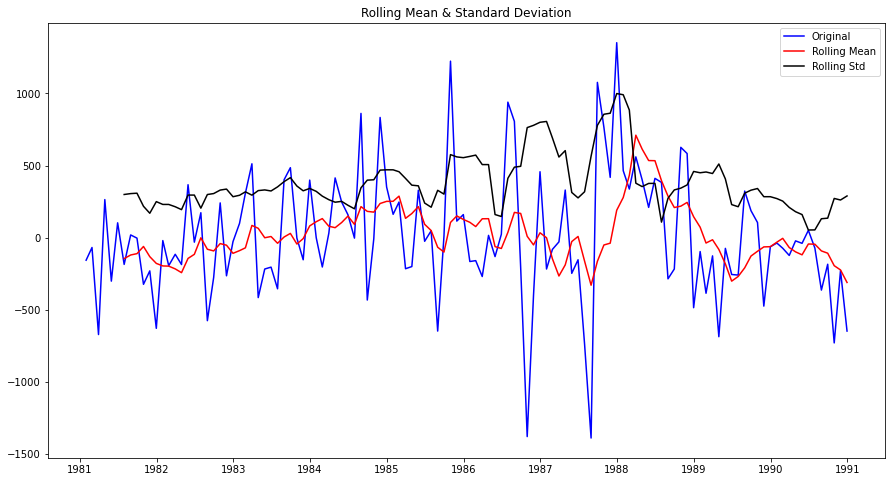

Results of Dickey-Fuller Test:
Test Statistic                  -3.136812
p-value                          0.023946
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [1005]:
test_stationarity((train['Sparkling'].diff(12).dropna()))

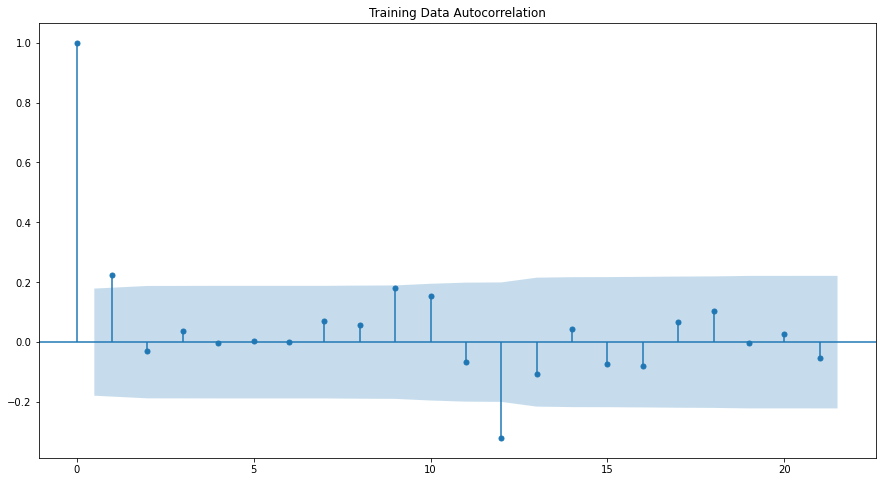

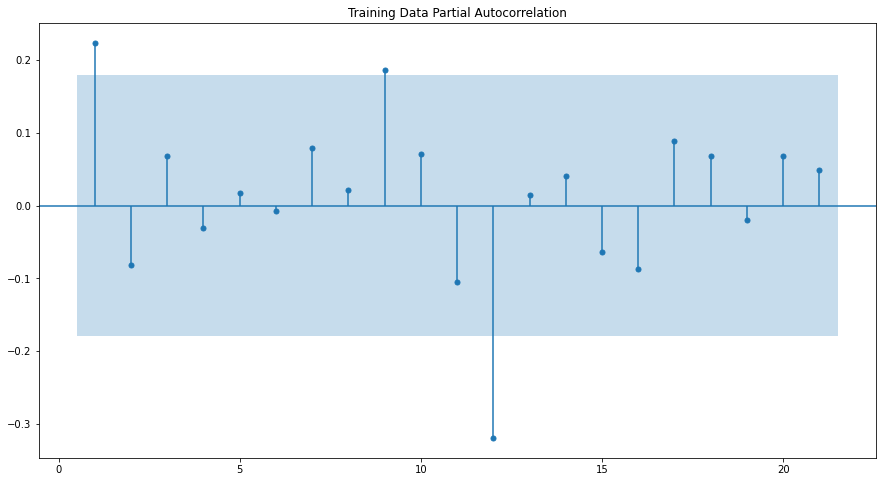

In [1006]:
plot_acf(train.diff(12).dropna(),title='Training Data Autocorrelation',missing='drop');
plot_pacf(train.diff(12).dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We are taking the p value to be 0 and the q value also to be 0 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 1. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 1.


In [1007]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -900.495
Date:                              Sat, 19 Mar 2022   AIC                           1806.991
Time:                                      22:10:41   BIC                           1815.303
Sample:                                           0   HQIC                          1810.365
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       1.0325      0.019     52.957      0.000       0.994       1.071
ma.S.L12      -0.53

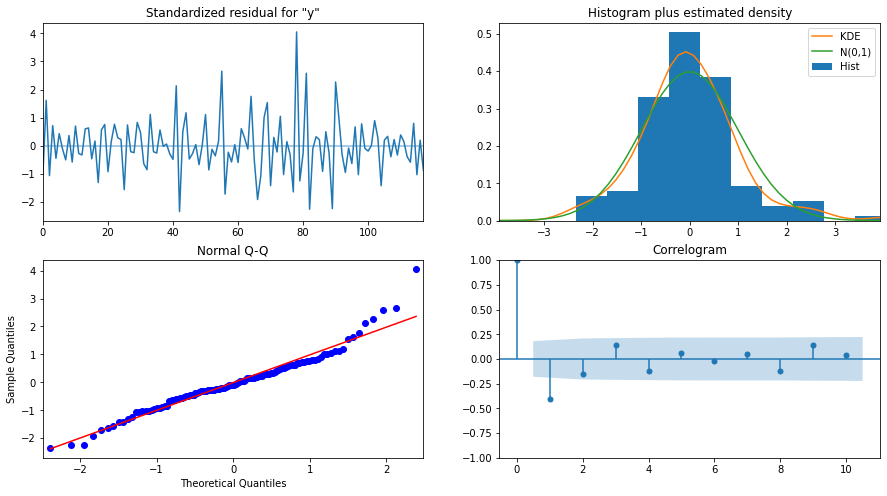

In [312]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [1008]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [1009]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean      mean_se  mean_ci_lower  mean_ci_upper
0   820.888032   496.283504    -151.809763    1793.585826
1   512.512844   701.850523    -863.088904    1888.114591
2  1008.023356   859.587690    -676.737558    2692.784269
3   856.770553   992.566288   -1088.623624    2802.164730
4   739.687026  1109.722792   -1435.329680    2914.703732

In [1010]:
rmse4 = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print('RMSE for manualSARIMA(0,1,0)(1,0,1,12) is:',round(rmse4,3))

RMSE for manualSARIMA(0,1,0)(1,0,1,12) is: 1787.707


In [1011]:
rmse_manual_sarima = pd.DataFrame({'Test RMSE': round(rmse4,3)}
                              ,index=['SARIMA(0,1,0)(1,0,1,12)based on ACF & PACF values'])

rmse_manual_sarima

Test RMSE
SARIMA(0,1,0)(1,0,1,12)based on ACF & PACF values   1787.707

In [1012]:
resultsDf = pd.concat([resultsDf, rmse_manual_sarima])
resultsDf

Test RMSE
RegressionOnTime                                     1389.135
NaiveModel                                           3864.279
SimpleAverageModel                                   1275.082
2pointTrailingMovingAverage                           813.401
4pointTrailingMovingAverage                          1156.590
6pointTrailingMovingAverage                          1283.927
9pointTrailingMovingAverage                          1346.278
Alpha=0.0496:SimpleExponentialSmoothing              1316.135
Alpha=0.1,SimpleExponentialSmoothing                 1375.393
Alpha=0.688,Beta=0.0001 :DoubleExponentialSmoot...   2007.239
Alpha=0.1&Beta=0.1,DoubleExponentialSmoothing        1778.565
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...    469.659
Alpha=0.4,Beta=0.1,Gamma=0.2:TripleExponentialS...    336.715
ARIMA(2,1,2) based on AIC value                      1299.980
SARIMA(1,1,2)(1,0,2,12)based on AIC value             528.607
ARIMA(0,1,0)based on ACF & PACF values               3864.279
SARIMA(0,1,0)(1,0,1,12)based on ACF & PACF values    1787.707

### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [1013]:
resultsDf

Test RMSE
RegressionOnTime                                     1389.135
NaiveModel                                           3864.279
SimpleAverageModel                                   1275.082
2pointTrailingMovingAverage                           813.401
4pointTrailingMovingAverage                          1156.590
6pointTrailingMovingAverage                          1283.927
9pointTrailingMovingAverage                          1346.278
Alpha=0.0496:SimpleExponentialSmoothing              1316.135
Alpha=0.1,SimpleExponentialSmoothing                 1375.393
Alpha=0.688,Beta=0.0001 :DoubleExponentialSmoot...   2007.239
Alpha=0.1&Beta=0.1,DoubleExponentialSmoothing        1778.565
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...    469.659
Alpha=0.4,Beta=0.1,Gamma=0.2:TripleExponentialS...    336.715
ARIMA(2,1,2) based on AIC value                      1299.980
SARIMA(1,1,2)(1,0,2,12)based on AIC value             528.607
ARIMA(0,1,0)based on ACF & PACF values               3864.279
SARIMA(0,1,0)(1,0,1,12)based on ACF & PACF values    1787.707

In [1014]:
resultsDf.sort_values(by='Test RMSE')

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2:TripleExponentialS...    336.715
Alpha=0.111,Beta=0.062,Gamma=0.395,TripleExpone...    469.659
SARIMA(1,1,2)(1,0,2,12)based on AIC value             528.607
2pointTrailingMovingAverage                           813.401
4pointTrailingMovingAverage                          1156.590
SimpleAverageModel                                   1275.082
6pointTrailingMovingAverage                          1283.927
ARIMA(2,1,2) based on AIC value                      1299.980
Alpha=0.0496:SimpleExponentialSmoothing              1316.135
9pointTrailingMovingAverage                          1346.278
Alpha=0.1,SimpleExponentialSmoothing                 1375.393
RegressionOnTime                                     1389.135
Alpha=0.1&Beta=0.1,DoubleExponentialSmoothing        1778.565
SARIMA(0,1,0)(1,0,1,12)based on ACF & PACF values    1787.707
Alpha=0.688,Beta=0.0001 :DoubleExponentialSmoot...   2007.239
ARIMA(0,1,0)based on ACF & PACF values               3864.279
NaiveModel                                           3864.279

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.4,  𝛽  = 0.1 and  𝛾  = 0.2.

Let us now build the model using the same parameters on the full data and check the confidence bands when we forecast into the future for the length of the test set.

In [881]:
fullmodel = ExponentialSmoothing(df_spark,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.2)

In [882]:
RMSE_fullmodel = metrics.mean_squared_error(df_spark['Sparkling'],fullmodel.fittedvalues,squared=False)

print('RMSE for full model with Triple Exponential Smoothing 𝛼 = 0.4,𝛽 = 0.1 and 𝛾 = 0.2:',round(RMSE_fullmodel,3))

RMSE for full model with Triple Exponential Smoothing 𝛼 = 0.4,𝛽 = 0.1 and 𝛾 = 0.2: 376.775


In [883]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel.forecast(steps=len(test))
prediction_2

1995-08-31    2063.449003
1995-09-30    2579.407611
1995-10-31    3416.654569
1995-11-30    4304.477507
1995-12-31    6604.876992
1996-01-31    1564.539934
1996-02-29    1849.760096
1996-03-31    2098.878937
1996-04-30    2022.428870
1996-05-31    1834.540644
1996-06-30    1712.408937
1996-07-31    2176.425530
1996-08-31    2205.382711
1996-09-30    2755.820167
1996-10-31    3649.004422
1996-11-30    4595.554268
1996-12-31    7049.008288
1997-01-31    1669.157952
1997-02-28    1972.764855
1997-03-31    2237.680358
1997-04-30    2155.441530
1997-05-31    1954.538452
1997-06-30    1823.810840
1997-07-31    2317.250884
1997-08-31    2347.316419
1997-09-30    2932.232722
1997-10-31    3881.354275
1997-11-30    4886.631028
1997-12-31    7493.139585
1998-01-31    1773.775970
1998-02-28    2095.769615
1998-03-31    2376.481779
1998-04-30    2288.454191
1998-05-31    2074.536259
1998-06-30    1935.212743
1998-07-31    2458.076238
1998-08-31    2489.250126
1998-09-30    3108.645278
1998-10-31  

Text(0.5, 1.0, 'Plot of full model forecast')

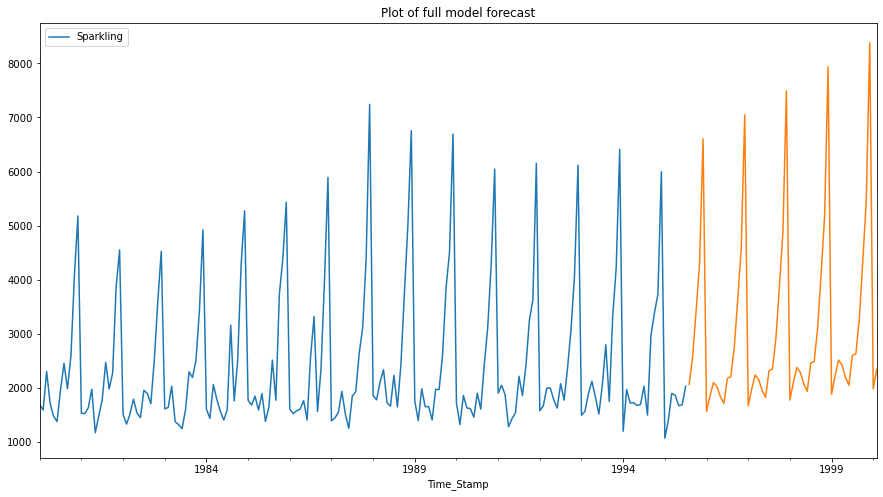

In [754]:
df_spark.plot()
prediction_2.plot();
plt.title('Plot of full model forecast')

### Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [884]:
prediction_3 = fullmodel.forecast(steps=12)
prediction_3

1995-08-31    2063.449003
1995-09-30    2579.407611
1995-10-31    3416.654569
1995-11-30    4304.477507
1995-12-31    6604.876992
1996-01-31    1564.539934
1996-02-29    1849.760096
1996-03-31    2098.878937
1996-04-30    2022.428870
1996-05-31    1834.540644
1996-06-30    1712.408937
1996-07-31    2176.425530
Freq: M, dtype: float64

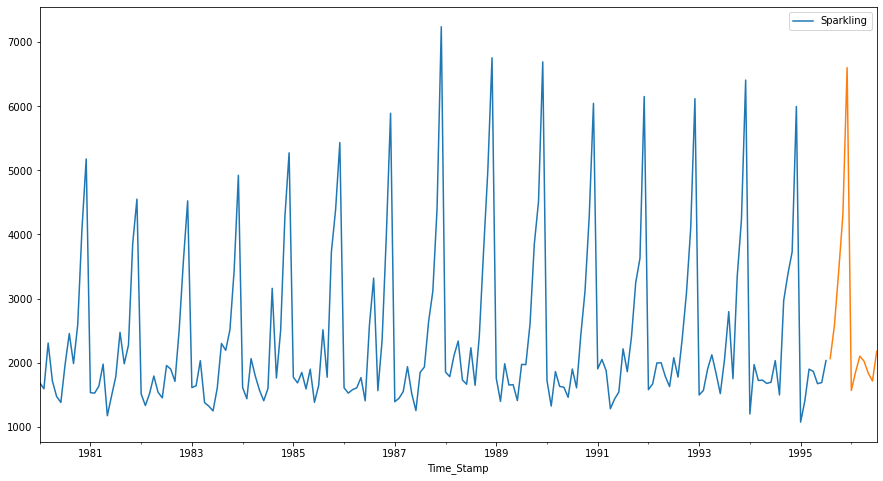

In [695]:
df_spark.plot()
prediction_3.plot();

In [885]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_3 - 1.96*np.std(fullmodel.resid,ddof=1),
                          'prediction':prediction_3,
                          'upper_ci': prediction_3 + 1.96*np.std(fullmodel.resid,ddof=1)})
pred_2_df

lower_CI   prediction     upper_ci
1995-08-31  1322.989337  2063.449003  2803.908669
1995-09-30  1838.947945  2579.407611  3319.867277
1995-10-31  2676.194903  3416.654569  4157.114235
1995-11-30  3564.017841  4304.477507  5044.937173
1995-12-31  5864.417326  6604.876992  7345.336658
1996-01-31   824.080268  1564.539934  2304.999600
1996-02-29  1109.300430  1849.760096  2590.219762
1996-03-31  1358.419272  2098.878937  2839.338603
1996-04-30  1281.969204  2022.428870  2762.888536
1996-05-31  1094.080979  1834.540644  2575.000310
1996-06-30   971.949271  1712.408937  2452.868603
1996-07-31  1435.965864  2176.425530  2916.885196

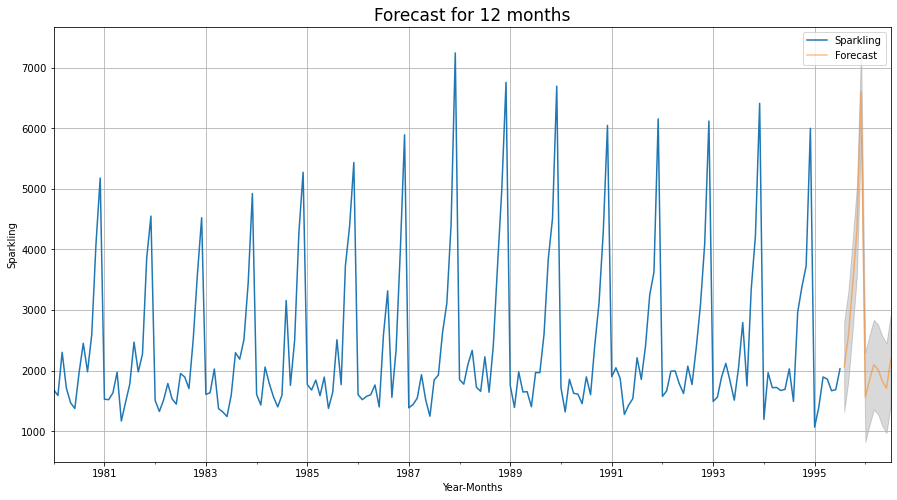

In [697]:
# plot the forecast along with the confidence band

axis = df_spark.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.title('Forecast for 12 months',fontsize=17);
plt.grid()
plt.show()